# Diabets Prediction using Machine Learning

Diabets Prediction using Machine Learning
    - Pythone
    - Support Vector Machine (SVM)

### Support Vector Machine (SVM) Algorithm

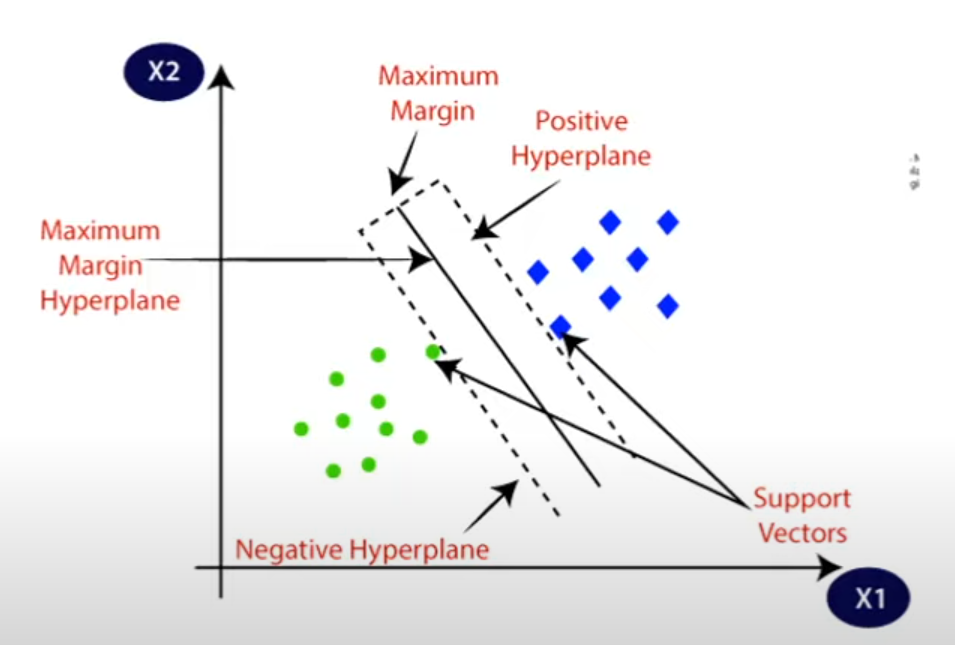

* This is a suppervise learning algorithm.

* We feed data to machine learning model and the machine learning model learn from data by using lables.

* We train our model using some medical information such as blood level, glucose level, insulin level of a patients.

* In here the person is diabetic or non-diabetic are the lable in here.

* When we feed data to our machine learning model it plot graph and try to find hyper plane (You can See hyper plane in image)

### Work Flow

01. Collect Diabets medical information

02. Data Preprocessing

03. Slipt data into Train Data and Test Data

04. Feed train data to Support Vector Machine Classifier

05. Use Test data to see the accuracy of the model

Import the Dependancies


In [ ]:
import numpy as np  ## This help to make numpy array
import pandas as pd  ## this is mainly use when creating data frame
from sklearn.preprocessing import StandardScaler ##  standarize data into common range
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [ ]:
# Loading the Diabetes dataset to a pandas DataFrame

diabetes_dataset = pd.read_csv('D:/My Projects/Machine Learning/01. Dibets-prodiction/diabetes.csv') # Please make your file path for this

In [6]:
# Printing first 5 rows of the dataset

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Numbers of Columns and rows in the dataset

diabetes_dataset.shape

(768, 9)

In [8]:
# Getting the statical measure of the data

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts() # 0 --> non-diabetic, 1 --> diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# Seperate data and label from the dataset

X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [18]:
# There are 8 features exist in the data set. 
# but you can see when condider the different features it have different ranges. 
# for a example Pregnancies 1-10, Glucose 85 - 150. 
# it is deficult to our algorithem to train the model.
# So this is the time to get those rage into one perticular range and it help model to get better prediction

scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)

In [19]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standarized_data # This is the Data
Y = diabetes_dataset['Outcome'] # This is the model

# these Data use for the train and test data

Seperate data to Train Data and Test Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Train Model

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
# Training the support vector machine classifier

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [26]:
# Accuracy Score in training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score for the training data : ', training_data_accuracy)



Accuracy score for the training data :  0.7866449511400652


In [27]:
# Accuracy Score in test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score for the test data : ', test_data_accuracy)

Accuracy score for the test data :  0.7727272727272727


Making a Predictive System

In [31]:
input_data = (4,110,92,0,0,37.6,0.191,30) # this is a list

# changing the input data to numpy array - this is more efficient and eassy to handle
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance - because our model train on 768 examples, so model looking for such data points and this solve that propblem
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # this reshape function cant use for list and it can use for numpy array

# standarized the input data
std_data = scaler.transform(input_data_reshaped)

prediction_clasifier = classifier.predict(std_data)
print(prediction_clasifier)

if (prediction_clasifier[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetics")

[0]
The person is not diabetic


c:\Users\nadun\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
